### **1. Mô tả bộ dataset**
Dataset từ Kaggle cung cấp dữ liệu gồm các bài báo với tiêu đề, nội dung, và nhãn.  
- **Cột dữ liệu chính**:
  - `title`: Tiêu đề bài báo.
  - `text`: Nội dung bài báo.
  - `label`: Nhãn, với:
    - 0: Tin giả.
    - 1: Tin thật.  
- **Đặc điểm**:
  - Bộ dữ liệu có số lượng lớn các bản ghi, giúp đào tạo và kiểm tra các mô hình học máy.

---

### **2. Mô tả bài toán**
**Bài toán**: Phân loại một bài báo là thật hay giả dựa trên tiêu đề và nội dung.  
- **Loại bài toán**: Classification (Supervised Learning).  
- **Mục tiêu**:  
  - Xây dựng mô hình dự đoán chính xác nhãn (`label`) của bài báo dựa trên tiêu đề và nội dung.
  - Đo lường hiệu suất mô hình qua độ chính xác, ma trận nhầm lẫn, và báo cáo phân loại.

---

### **3. Phương pháp thực hiện**
  - Sử dụng Logistic Regression hoặc các thuật toán khác như Random Forest, SVM, hoặc CNN.
  - Tiền xử lý dữ liệu với TfidfVectorizer.
  - Chia dữ liệu thành tập huấn luyện (train), kiểm tra (test), và đánh giá (valuation).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/LR/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/LR/data/evaluation.csv
/content/gdrive/MyDrive/LR/data/train.csv
/content/gdrive/MyDrive/LR/data/test.csv


In [ ]:
import pandas as pd

# Tải dữ liệu từ các tệp CSV
train = pd.read_csv("/content/gdrive/MyDrive/LR/data/train.csv", delimiter=';')
test = pd.read_csv("/content/gdrive/MyDrive/LR/data/test.csv", delimiter=';')
eval = pd.read_csv("/content/gdrive/MyDrive/LR/data/evaluation.csv", delimiter=';')

# Kiểm tra thông tin dữ liệu
print(train.head())
print(test.head())
print(eval.head())


   Unnamed: 0                                              title  \
0           0  Palestinians switch off Christmas lights in Be...   
1           1  China says Trump call with Taiwan president wo...   
2           2   FAIL! The Trump Organization’s Credit Score W...   
3           3  Zimbabwe military chief's China trip was norma...   
4           4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   

                                                text  label  
0  RAMALLAH, West Bank (Reuters) - Palestinians s...      1  
1  BEIJING (Reuters) - U.S. President-elect Donal...      1  
2  While the controversy over Trump s personal ta...      0  
3  BEIJING (Reuters) - A trip to Beijing last wee...      1  
4  There has never been a more UNCOURAGEOUS perso...      0  
   Unnamed: 0                                              title  \
0           0  Live from New York, it's a Trump-Clinton remat...   
1           1  Catalan separatists to lose majority in tight ...   
2           2  

Loại bỏ stopwords, stemming, và sử dụng phương pháp vector hóa như TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize văn bản
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(train['text'])
y = train['label']

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Support Vector Machine (SVM) là một thuật toán học máy mạnh mẽ dùng cho phân loại. SVM tìm cách tạo ra một siêu phẳng (hyperplane) phân chia các lớp sao cho khoảng cách giữa các điểm dữ liệu gần nhất của các lớp khác nhau (được gọi là margin) là lớn nhất.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Khởi tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Dùng kernel 'linear' cho phân loại tuyến tính

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_svm = svm_model.predict(X_test)

# Đánh giá mô hình
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm * 100:.2f}%")
print(classification_report(y_test, y_pred_svm))


Accuracy of SVM: 96.77%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3282
           1       0.98      0.96      0.97      4024

    accuracy                           0.97      7306
   macro avg       0.97      0.97      0.97      7306
weighted avg       0.97      0.97      0.97      7306



**Nhận xét kết quả từ ảnh sử dụng thuật toán SVM:**

1. **Accuracy:** Mô hình đạt độ chính xác 96.77%, cho thấy khả năng dự đoán tốt.  
2. **Precision:**  
   - Lớp 0: 95% (một số dự đoán dương tính là sai).  
   - Lớp 1: 98% (rất ít sai sót).  
3. **Recall:**  
   - Lớp 0: 98% (mô hình xác định tốt hầu hết các mẫu lớp 0).  
   - Lớp 1: 96% (một vài mẫu lớp 1 bị bỏ sót).  
4. **F1-score:** Trung bình là 0.97, cân bằng tốt giữa precision và recall.

**Đánh giá tổng quan:** Thuật toán SVM hoạt động hiệu quả, đặc biệt với dữ liệu cân đối.

**Biểu đồ ma trận nhầm lẫn (confusion matrix)**

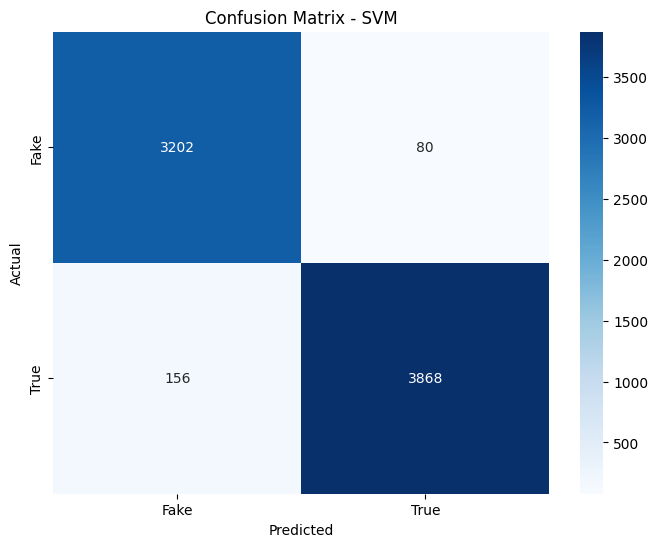

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tạo ma trận nhầm lẫn
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


**Biểu Đồ Đánh Giá Hiệu Suất (Performance Metrics)**

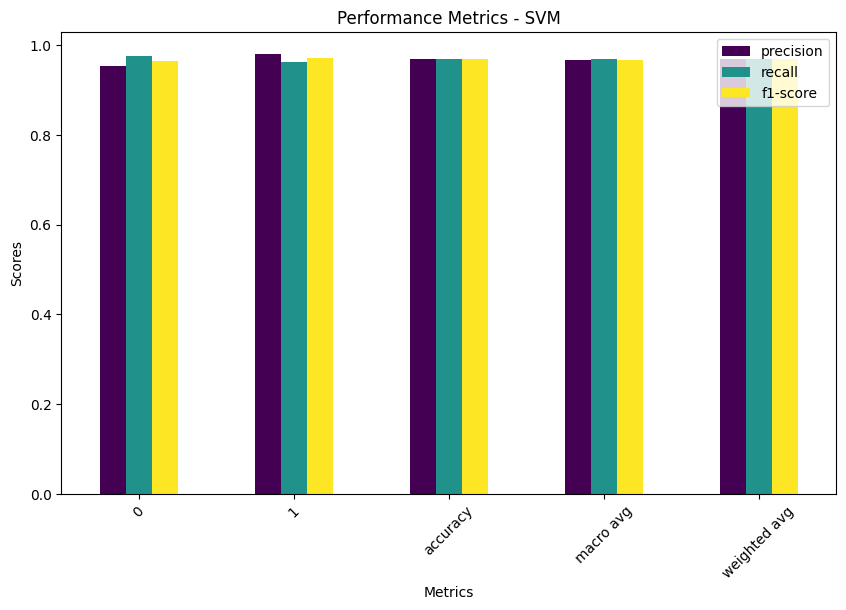

In [ ]:
# Đánh giá hiệu suất mô hình với các chỉ số precision, recall và f1-score
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()

# Vẽ biểu đồ đánh giá hiệu suất
report_svm_df.drop(columns=['support'], inplace=True)  # Loại bỏ cột 'support'
report_svm_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Performance Metrics - SVM')
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()


**Biểu Đồ ROC Curve**

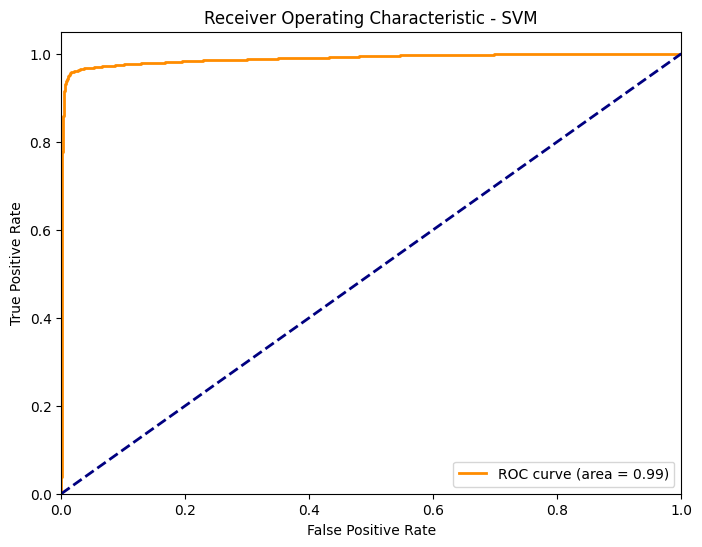

In [ ]:
from sklearn.metrics import roc_curve, auc

# Tính toán ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.show()
